<a href="https://colab.research.google.com/github/sheng-999/machinelearningtest/blob/upload/Customers_and_orders_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 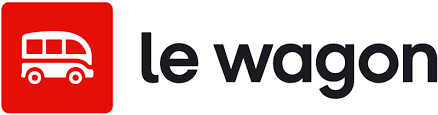

# Customers and orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to : Create order and customer clusters.

## Orders clustering

a) Execute cell below to load data into `df` variable.

It will select 50k orders randomly.

In [1]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           0.00          11.36   
1              0.00             0.00         116.14           0.00   
2             11.46            79.83           0.00           0.00   
3             65.50            41.07           0.00           0.00   
4             10.00             0.00           0.00           0.00   

   turnover_fresh  promo_rate  
0             0.0    0.300000  
1             0.0    0.135629  
2             0.0    0.100000  
3             0.0    0.126405  
4             0.0         NaN

b) Which features do you see? Are there any null values?

In [5]:
df.isnull().sum()

# 15920 null values for promo_rate

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          15920
dtype: int64

c) Replace null values (if any) by 0 using the `fillna()` method of pandas.

In [8]:
df['promo_rate'].fillna(0, inplace= True)

In [9]:
df.isnull().sum()

turnover_grocery    0
turnover_beauty     0
turnover_baby       0
turnover_home       0
turnover_fresh      0
promo_rate          0
dtype: int64

d) In a `df_orders` variable, keep all turnover columns of df. These features will help us to cluster orders.

In [10]:
df_orders = df.drop(columns=['promo_rate'])
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           0.00          11.36   
1              0.00             0.00         116.14           0.00   
2             11.46            79.83           0.00           0.00   
3             65.50            41.07           0.00           0.00   
4             10.00             0.00           0.00           0.00   

   turnover_fresh  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

e) Use plotly.express and a box chart to see if turnover distribution is different per category.

In [11]:
import plotly.express as px

In [13]:
px.box(
    df_orders,
)

f) Very few orders include fresh product.
Delete the 'turnover_fresh' column from `df_orders`.

In [14]:
df_orders = df_orders.drop(columns=['turnover_fresh'])

In [15]:
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0              0.00             0.00           0.00          11.36
1              0.00             0.00         116.14           0.00
2             11.46            79.83           0.00           0.00
3             65.50            41.07           0.00           0.00
4             10.00             0.00           0.00           0.00

g) Train a first kmeans algorithm with two a-priori clusters.


In [29]:
from sklearn.cluster import KMeans

# choose 2 clusters & initialization
km = KMeans(n_clusters=2, random_state=0, init='k-means++',n_init=10).fit(df_orders)

In [31]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [30]:
# fit features df_orders
km.fit(df_orders)
km.inertia_

181932406.82730678

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [37]:
inertias = []
n_k = range(1, 11)

# for each number of centroids
for k in n_k:
  # train Kmeans algorithm & try different clusters
  kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++',n_init=10).fit(df_orders)
  inertia = kmeans.inertia_
  # store inertia
  inertias.append(inertia)


inertias

[242918521.31723115,
 181932406.82730678,
 130465411.0391919,
 114204601.54394925,
 98897578.52577041,
 85226547.4977667,
 73886979.3847434,
 67006834.69709,
 61118755.57662288,
 56792264.73618896]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [39]:
px.line(
    y = inertias,
    x=range(1,11),
    labels = {'x':'NB Clusters','y':'Inertias results'}
)

<details>
    <summary><i>Solution</i></summary>

Elbow method shows that 3 is the number of clusters to use because it forms like an elbow.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [41]:
km = KMeans(n_clusters=3, random_state=0, init='k-means++',n_init=100).fit(df_orders)

130465128.44251817

In [42]:
labels = km.predict(df_orders)
labels

array([1, 2, 1, ..., 1, 1, 0], dtype=int32)

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

In [47]:
import seaborn as sns

<Axes: ylabel='count'>

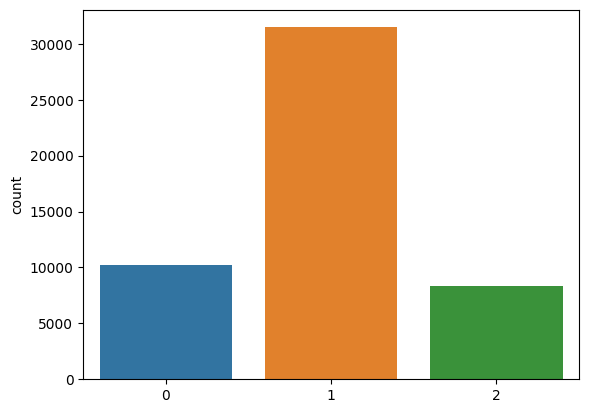

In [54]:
sns.countplot(
    x=labels # It's same value if we put labels in dataframe and count()
)

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluser_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the right column names for each turnover feature.

In [55]:
pd.DataFrame(km.cluster_centers_, columns=df_orders.columns)

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0         91.982752        12.041599       2.657965       5.872235
1         11.319622        23.422035       5.065673      15.268934
2          5.558607         6.027511      92.692154       3.126201

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

3 types of orders : 1 with mostly groceries, 1 with baby products and 1 with a lower amount, mainly mixing beauty and home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [56]:
df['label'] = labels

q) What does this instruction do? What can you say?

In [57]:
df[df["promo_rate"]>0].groupby("label").size()/df.groupby("label").size()

label
0    0.796864
1    0.652235
2    0.650710
dtype: float64


*  It's the percentage of promo of total samples numbers per cluster



# Customers clustering



a) Execute cell below to load customer data into `df_customers` variable.

In [58]:
query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh
FROM `data-analytics-bootcamp-363212.course33.gwz_customers_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df_customers = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df_customers = df_customers.drop(columns=["turnover_fresh"])
df_customers.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0             24.30             0.00            0.0           0.00
1             13.29             7.19            0.0           0.00
2             43.93             0.00            0.0           0.00
3              0.00            49.65            0.0          70.74
4              0.00           686.16            0.0         207.75

b) Use elbow method to see if a number of cluster a priori exists or not for this dataset.

Plot results in a chart. What can you say?

In [59]:
inertias = []
n_k = range(1, 11)

# for each number of centroids
for k in n_k:
  # train Kmeans algorithm & try different clusters
  kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++',n_init=10).fit(df_customers)
  inertia = kmeans.inertia_
  # store inertia
  inertias.append(inertia)


inertias

[9090657451.001759,
 6246840031.275507,
 4651047431.246368,
 3771873344.012678,
 3126648387.9843807,
 2659849996.001787,
 2275474919.420614,
 2025952736.954264,
 1834987809.0871646,
 1705428969.131282]

In [61]:
px.line(
    y=inertias,
    x=range(1,11)
)

<details>
    <summary><i>Solution</i></summary>

There is no obvious choice. No distinct clusters seem exist.
</details>

c) From orders and customers clustering, what can you conclude?

<details>
    <summary><i>Solution</i></summary>

We have seen that there was 3 clusters for orders.
One for grocery purchase, one for baby purchase and diversify one.

But there is no obvious customers cluster. It means that when a customer buy somthing on greenweez, it's for a specific need. But a same customer can one day come to buy one category and another days for a different one.
Customers don"t seem to buy specific categories only.

</details>